In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle

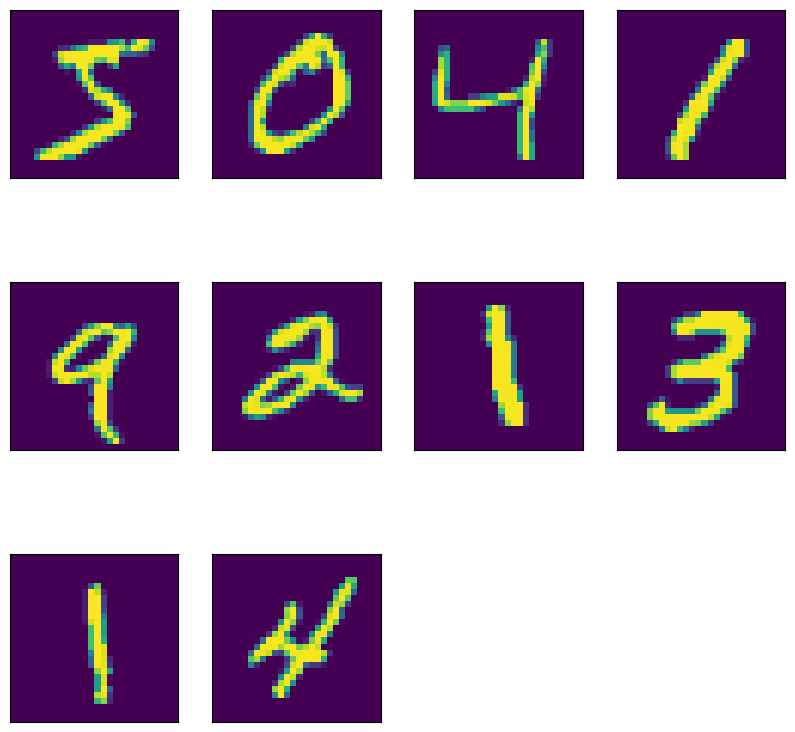

In [13]:
mnist = tf.keras.datasets.mnist

(image_train, label_train), (image_test, label_test) = mnist.load_data()
image_train, image_test = image_train / 255.0, image_test / 255.0

plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_train[i])
   
    
plt.show()

In [14]:
#batch
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(2,2),activation="sigmoid",
input_shape=(28,28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64,(2,2),activation="sigmoid"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128,(2,2),2,activation="sigmoid"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32,(2,2),activation="sigmoid"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64,(2,2),activation="sigmoid"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128,(2,2),2,activation="sigmoid"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="sigmoid"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [15]:
model.compile(
    loss = "sparse_categorical_crossentropy",  
    optimizer = "adam",
    metrics=["accuracy"])

history = model.fit(image_train, label_train,
                    validation_data=(image_test,label_test),
                    epochs=10, batch_size=10)
model.summary()
model.save('./mnist2.h5')

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 66s 11ms/step - accuracy: 0.9362 - loss: 0.2235 - val_accuracy: 0.9775 - val_loss: 0.0752
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 78s 13ms/step - accuracy: 0.9764 - loss: 0.0762 - val_accuracy: 0.9425 - val_loss: 0.1679
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 79s 13ms/step - accuracy: 0.9794 - loss: 0.0674 - val_accuracy: 0.9714 - val_loss: 0.0892
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 79s 13ms/step - accuracy: 0.9819 - loss: 0.0570 - val_accuracy: 0.9797 - val_loss: 0.0669
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 78s 13ms/step - accuracy: 0.9833 - loss: 0.0536 - val_accuracy: 0.9827 - val_loss: 0.0521
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 76s 13ms/step - accuracy: 0.9846 - loss: 0.0488 - val_accuracy: 0.9838 - val_loss: 0.0528
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 66s 11ms/step - accuracy: 0.9853 - loss: 0.0462 - val_accuracy: 0.9864 - val_loss: 0.0438
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 61s 10ms/step - accuracy: 0.9864 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 27, 27, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 26, 26, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 13, 13, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 12, 12, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,533,280 (5.85 MB)

 Trainable params: 510,794 (1.95 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 1,021,590 (3.90 MB)

In [16]:
with open('historyBatch', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)